In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/sonar.csv


# Reading Sonar Data

In [3]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
sonar=pd.read_csv("/kaggle/input/sonar.csv")
sonar.head(10)

,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,...,att52,att53,att54,att55,att56,att57,att58,att59,att60,class
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
5,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R
6,0.0317,0.0956,0.1321,0.1408,0.1674,0.1710,0.0731,0.1401,0.2083,0.3513,...,0.0201,0.0248,0.0131,0.0070,0.0138,0.0092,0.0143,0.0036,0.0103,R
7,0.0519,0.0548,0.0842,0.0319,0.1158,0.0922,0.1027,0.0613,0.1465,0.2838,...,0.0081,0.0120,0.0045,0.0121,0.0097,0.0085,0.0047,0.0048,0.0053,R
8,0.0223,0.0375,0.0484,0.0475,0.0647,0.0591,0.0753,0.0098,0.0684,0.1487,...,0.0145,0.0128,0.0145,0.0058,0.0049,0.0065,0.0093,0.0059,0.0022,R
9,0.0164,0.0173,0.0347,0.0070,0.0187,0.0671,0.1056,0.0697,0.0962,0.0251,...,0.0090,0.0223,0.0179,0.0084,0.0068,0.0032,0.0035,0.0056,0.0040,R


In [4]:
df = pd.DataFrame()

# Splitting in trainig and Testing

In [5]:
from sklearn.model_selection import train_test_split
X=sonar.iloc[:,0:60]
y=sonar.iloc[:,60]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Creating Ensembles

In [29]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
#Initalize the classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score



log_clf = LogisticRegression(random_state=45)
knn_clf = KNeighborsClassifier(n_neighbors=10)
svm_clf = SVC(gamma="auto", random_state=45, probability=True)
tree_clf = DecisionTreeClassifier(random_state=45) 
tree_clf1 = DecisionTreeClassifier(random_state=45) 
knn1_clf = KNeighborsClassifier(n_neighbors=5)
knn2_clf = KNeighborsClassifier(n_neighbors=15)


voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('knn', knn_clf), ('svc', svm_clf),('tree',tree_clf),('knn1',knn1_clf)],
    voting='soft')

voting_clf1 = VotingClassifier(
    estimators=[('lr', log_clf), ('knn', knn_clf), ('svc', svm_clf),('tree',tree_clf),('knn1',knn1_clf),('tree1',tree_clf1),('knn2',knn2_clf)],
    voting='soft')

voting_clf2 = VotingClassifier(
    estimators=[('lr', log_clf), ('knn', knn_clf), ('svc', svm_clf)],
    voting='soft')

voting_clf3 = VotingClassifier(
    estimators=[('vc',voting_clf ), ('vc1',voting_clf1), ('vc2',voting_clf2)],
    voting='soft')
voting_clf3.fit(X_train, y_train)
y_pred = voting_clf3.predict(X_test)
# Voting can be changed to 'Soft', however the classifer must support predict probability

In [30]:
#voting_clf.fit(X_train, y_train)
from sklearn.metrics import accuracy_score
df = pd.DataFrame()
for clf in (log_clf, knn_clf, svm_clf, voting_clf,voting_clf1,voting_clf2, voting_clf3):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))
    a_row = pd.Series([clf.__class__.__name__, accuracy_score(y_test, y_pred)])
    row_df = pd.DataFrame([a_row])
    df = pd.concat([row_df, df], ignore_index=True)
    
df


LogisticRegression 0.8076923076923077
KNeighborsClassifier 0.7884615384615384
SVC 0.6923076923076923
VotingClassifier 0.9038461538461539
VotingClassifier 0.8269230769230769
VotingClassifier 0.8846153846153846
VotingClassifier 0.8653846153846154


,0,1
0,VotingClassifier,0.865385
1,VotingClassifier,0.884615
2,VotingClassifier,0.826923
3,VotingClassifier,0.903846
4,SVC,0.692308
5,KNeighborsClassifier,0.788462
6,LogisticRegression,0.807692


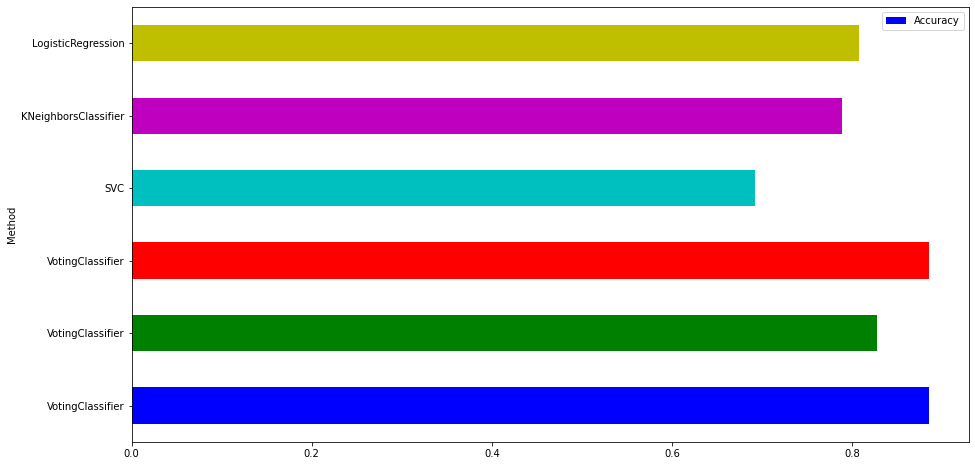

In [7]:
df.columns=['Method','Accuracy']
from itertools import cycle, islice
my_colors = list(islice(cycle(['b', 'g', 'r', 'c', 'm', 'y', 'k']), None, len(df)))
df.plot.barh(x='Method', y='Accuracy', rot=0,color=my_colors,figsize=(15,8))